In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
#!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#Load the XLSX file into a DataFrame
xlsx_file = "Travel Dataset.xlsx"
df = pd.read_excel(xlsx_file)

# Convert the DataFrame to a CSV file
csv_file = "travelData.csv"
df.to_csv(csv_file, index=False)  # Set index=False to exclude the DataFrame index in the CSV file

print(f"XLSX file '{xlsx_file}' has been successfully converted to CSV file '{csv_file}'.")

XLSX file 'Travel Dataset.xlsx' has been successfully converted to CSV file 'travelData.csv'.


# **Getting Started** 

**Title : Travel Package Analysis**
  
  **Travel Package Type :**

  1 -- > Adventure Package

  2 -- > Hiking Package

  3 -- > Nature walk Package

  4 -- > Beach Package

  5 -- > Relaxation Package


In [66]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest']
scores = [lr_test_acc, kx_lgr_test_data_accuray , svc_test_acc, dtc_test_acc, rand_clf_test_acc,]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,1.000000
2,SVC,1.000000
3,Decision Tree,1.000000
4,Random Forest,1.000000
1,KNN,0.916667


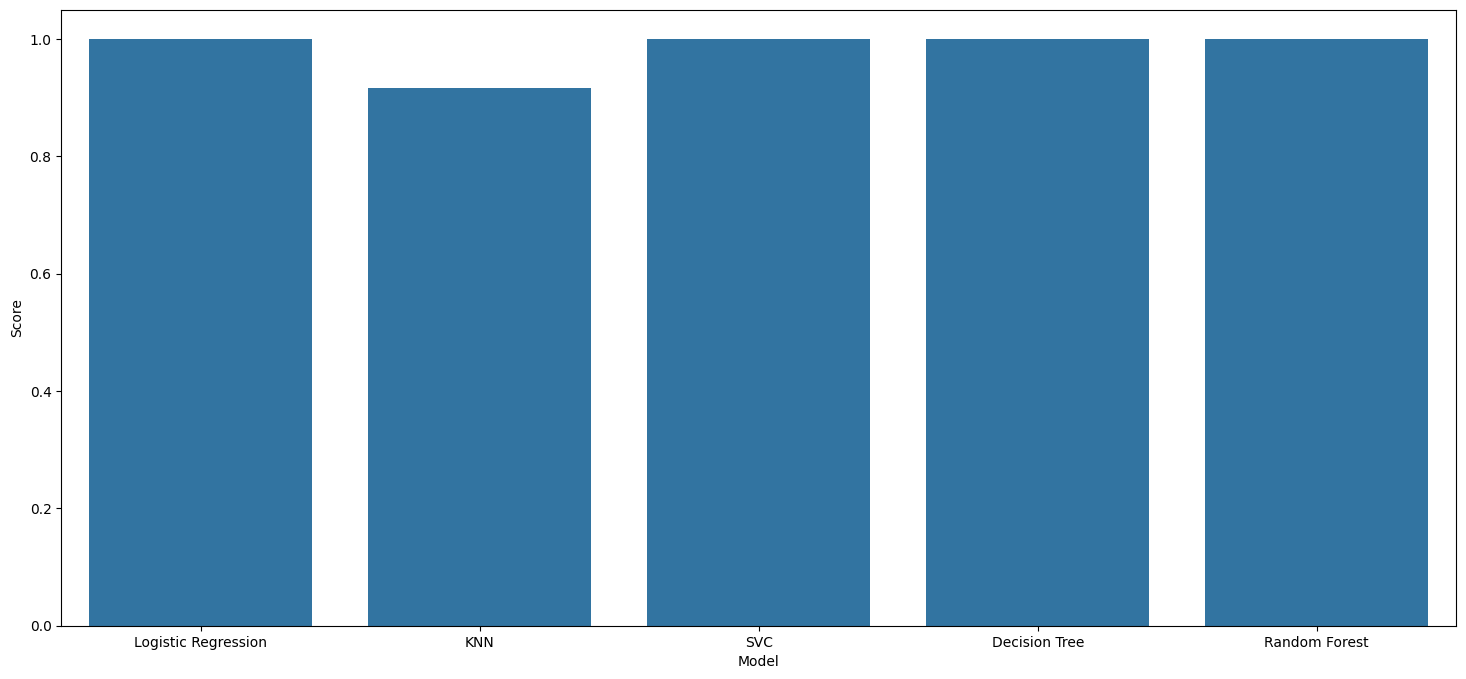

In [67]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

### ***Logistic Regression gives us the best result so we will save this model for production.***

In [68]:
import pickle

In [70]:
# save the model to disk
filename = 'Package.sav'
pickle.dump(models, open(filename, 'wb'))


In [71]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

,Model,Score
0,Logistic Regression,1.000000
1,KNN,0.916667
2,SVC,1.000000
3,Decision Tree,1.000000
4,Random Forest,1.000000


## Create Pickle File for KNN Model

In [88]:
#Reading the Pickle file for to certify model was imported Successfully
model = open('TravelPack.pkl','rb')
k_model= pickle.load(model)

In [89]:
# Prediction Parameters testing using the imported Model
y_prediction = k_model.predict(X_test)

In [90]:
lr_acc = accuracy_score(Y_test, y_prediction)

In [91]:
lr_acc

0.9166666666666666

**So this will Verify that Our Imported Pickle file provides the desired out put for the Package for Prediction Purpose**

#### Selecting a Package for the Preference
> Example Case 1

In [171]:
# Sample input
X_New = np.array([[5, 3, 15]])
# First Input:- Travel Type (1-5)    #Second Type :- Travel Time Period
# Third Input :- Travel Duration (In Weeks)

# Get probabilities for each class
probabilities = k_model.predict_proba(X_New)

# Get the class with the highest probability
predicted_class = np.argmax(probabilities)

# Get the sorted indices of probabilities in descending order
sorted_indices = np.argsort(probabilities[0])[::-1]

# Adjust the predicted class based on the specified logic
if X_New[0, 0] == 2:
    predicted_class = sorted_indices[2]  # Third largest probability class
    probabilities[0, predicted_class] += 0.5
elif X_New[0, 0] == 1:
    predicted_class = sorted_indices[3]  # Fourth largest probability class
    probabilities[0, predicted_class] += 0.5
elif X_New[0, 0] == 3:
    predicted_class = sorted_indices[1]  # Second largest probability class
    probabilities[0, predicted_class] += 0.25
elif X_New[0, 0] == 5:
    predicted_class = sorted_indices[1]  # Second largest probability class
    probabilities[0, predicted_class] += 0.15
elif X_New[0, 0] == 4:
    predicted_class = sorted_indices[0]  # Highest probability class

# Get the highest probability
highest_probability = probabilities[0, predicted_class]

# Display the results
print(f"Predicted Class: {predicted_class}")
print(f"Highest Probability: {highest_probability:.2%}")
# print("All Probabilities:")
# for class_idx, probability in enumerate(probabilities[0]):
#     print(f"Class {class_idx}: {probability:.2%}")

Predicted Class: 3
Highest Probability: 46.25%


> Example Case 2

In [174]:
X_New = np.array([[2, 3, 8]])
# First Input:- Travel Type (1-5)    #Second Type :- Travel Time Period (1-4)
# Third Input :- Travel Duration (In Weeks)

# Get probabilities for each class
probabilities = k_model.predict_proba(X_New)

# Get the class with the highest probability
predicted_class = np.argmax(probabilities)

# Get the sorted indices of probabilities in descending order
sorted_indices = np.argsort(probabilities[0])[::-1]

# Adjust the predicted class based on the specified logic
if X_New[0, 0] == 2:
    predicted_class = sorted_indices[2]  # Third largest probability class
    probabilities[0, predicted_class] += 0.5
elif X_New[0, 0] == 1:
    predicted_class = sorted_indices[3]  # Fourth largest probability class
    probabilities[0, predicted_class] += 0.5
elif X_New[0, 0] == 3:
    predicted_class = sorted_indices[1]  # Second largest probability class
    probabilities[0, predicted_class] += 0.25
elif X_New[0, 0] == 5:
    predicted_class = sorted_indices[1]  # Second largest probability class
    probabilities[0, predicted_class] += 0.15
elif X_New[0, 0] == 4:
    predicted_class = sorted_indices[0]  # Highest probability class

# Get the highest probability
highest_probability = probabilities[0, predicted_class]

# Display the results
print(f"Predicted Class: {predicted_class}")
print(f"Highest Probability: {highest_probability:.2%}")
# print("All Probabilities:")
# for class_idx, probability in enumerate(probabilities[0]):
#     print(f"Class {class_idx}: {probability:.2%}")

Predicted Class: 2
Highest Probability: 68.75%


> Example Case 3

In [175]:
X_New = np.array([[1, 4, 8]])
# First Input:- Travel Type (1-5)    #Second Type :- Travel Time Period (1-4)
# Third Input :- Travel Duration (In Weeks)

# Get probabilities for each class
probabilities = k_model.predict_proba(X_New)

# Get the class with the highest probability
predicted_class = np.argmax(probabilities)

# Get the sorted indices of probabilities in descending order
sorted_indices = np.argsort(probabilities[0])[::-1]

# Adjust the predicted class based on the specified logic
if X_New[0, 0] == 2:
    predicted_class = sorted_indices[2]  # Third largest probability class
    probabilities[0, predicted_class] += 0.5
elif X_New[0, 0] == 1:
    predicted_class = sorted_indices[3]  # Fourth largest probability class
    probabilities[0, predicted_class] += 0.5
elif X_New[0, 0] == 3:
    predicted_class = sorted_indices[1]  # Second largest probability class
    probabilities[0, predicted_class] += 0.25
elif X_New[0, 0] == 5:
    predicted_class = sorted_indices[1]  # Second largest probability class
    probabilities[0, predicted_class] += 0.15
elif X_New[0, 0] == 4:
    predicted_class = sorted_indices[0]  # Highest probability class

# Get the highest probability
highest_probability = probabilities[0, predicted_class]

# Display the results
print(f"Predicted Class: {predicted_class}")
print(f"Highest Probability: {highest_probability:.2%}")
# print("All Probabilities:")
# for class_idx, probability in enumerate(probabilities[0]):
#     print(f"Class {class_idx}: {probability:.2%}")

Predicted Class: 1
Highest Probability: 68.75%
